# Описание проекта

   Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например,
XboxилиPlayStation).
    Вам нужно выявить определяющиеуспешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
    Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными.
    Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
    В наборе данных попадается аббревиатураESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр.ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию,
например, «Для взрослых», «Для детей младшего возраста» или «Для подростков»

# Ход выполнения проекта:

 - Шаг 1. Откройте файл с данными и изучите общую информацию
 - Шаг 2. Подготовьте данные:
    - Замените названия столбцов (приведите к нижнему регистру);
    - Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
    - Обработайте пропуски при необходимости:
    - Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
    - Опишите причины, которые могли привести к пропускам;
    - Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;
    - Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.
 - Шаг 3. Проведите исследовательский анализ данных
    - Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
    - Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
    - Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
    - Не учитывайте в работе данные за предыдущие годы.
    - Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
    - Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
    - Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
    - Соотнесите выводы с продажами игр на других платформах.
    - Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?
 - Шаг 4. Составьте портрет пользователя каждого региона
    - Определите для пользователя каждого региона (NA, EU, JP):
    - Самые популярные платформы (топ-5). Опишите различия в долях продаж.
    - Самые популярные жанры (топ-5). Поясните разницу.
    - Влияет ли рейтинг ESRB на продажи в отдельном регионе?
 - Шаг 5. Проверьте гипотезы
    - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
    - Задайте самостоятельно пороговое значение alpha.

 - Шаг 6. Напишите общий вывод

In [1]:
import pandas as pd
import numpy as np
import datetime
import math as mth
import matplotlib.pyplot as plt
import seaborn
import datetime
import numpy as np
import scipy.stats as st
from scipy import stats as st

### Шаг 1. Откройте файл с данными и изучите общую информацию

In [2]:
try:
    df=pd.read_csv ('https://code.s3.yandex.net/datasets/games.csv')
except:
    df = pd.read_csv('/datasets/games.csv')

In [3]:
df.columns = ['название', 'платформа', 'год_выхода', 'жанр', 'продажи_северная_америка', 'продажи_европпа', 'продажи_япония','прдажи_другое','оценка_критиков', 'оценка_игроков', 'рейтинг']
df.head()
# По заданию названия в нижнем регистре. 

,название,платформа,год_выхода,жанр,продажи_северная_америка,продажи_европпа,продажи_япония,прдажи_другое,оценка_критиков,оценка_игроков,рейтинг
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   название                  16713 non-null  object 
 1   платформа                 16715 non-null  object 
 2   год_выхода                16446 non-null  float64
 3   жанр                      16713 non-null  object 
 4   продажи_северная_америка  16715 non-null  float64
 5   продажи_европпа           16715 non-null  float64
 6   продажи_япония            16715 non-null  float64
 7   прдажи_другое             16715 non-null  float64
 8   оценка_критиков           8137 non-null   float64
 9   оценка_игроков            10014 non-null  object 
 10  рейтинг                   9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
df['оценка_игроков'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [6]:
df['рейтинг'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [7]:
df[df['оценка_игроков'] == 'tbd']

,название,платформа,год_выхода,жанр,продажи_северная_америка,продажи_европпа,продажи_япония,прдажи_другое,оценка_критиков,оценка_игроков,рейтинг
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


#### Составим небольшой план по наблюдениям.

- Название - нехватает 2 строки, мы их никак не проверим. Выход 1 удалить.
- Платформа - все 16'715 строк. 
- Год выхода - не содержат 267 строк, это альтернативные платформы со старыми играми.
- Платформа - заполнены все строки.
- жанр - заполнены все строки.
- продажи  - во всех категориях запоолнены полностью.
- оценку критиков не содержат, как некоторые старые, так и некоторые сравнительно молодые проекты.
- оценка игроков, помимо Нан'ов так же содержит объект 'tbd' (To Be Determined), так обозначаются игры с малым количеством отсывов(меньше 4х).
- рейтинг - содержит категорийные значения их мы расшифруем в отдельный столбец, таких значений чуть больше половины.

### Шаг 2. Подготовка данных.

- Удалим строчки по названиям.

In [8]:
df = df.dropna(subset = ['название'])
df['название'].isnull().sum()

0

- Работа с датами.

In [9]:
df['год_выхода'] = df['год_выхода'].fillna(0)
df['год_выхода'] = df['год_выхода'].astype('int')

- Оценка игроков. Заменим 'tbd' и Nan  на нули, при необходимости эти строки учитывать не будем.

In [10]:
df.loc[(df['оценка_игроков'] == 'tbd') | (df['оценка_игроков'].isna()), 'оценка_игроков'] = 0
df['оценка_игроков'] = pd.to_numeric(df['оценка_игроков'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   название                  16713 non-null  object 
 1   платформа                 16713 non-null  object 
 2   год_выхода                16713 non-null  int64  
 3   жанр                      16713 non-null  object 
 4   продажи_северная_америка  16713 non-null  float64
 5   продажи_европпа           16713 non-null  float64
 6   продажи_япония            16713 non-null  float64
 7   прдажи_другое             16713 non-null  float64
 8   оценка_критиков           8137 non-null   float64
 9   оценка_игроков            16713 non-null  float64
 10  рейтинг                   9949 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


 - Оценка критиков.

In [12]:
df['оценка_критиков'] = df['оценка_критиков'].fillna(0)

 - Рейтинг.

In [13]:
df['рейтинг'] = df['рейтинг'].fillna(0)

In [14]:
# Создадим функцию и новую колонку 
def category(row):    
    games = row['рейтинг']
    if games == 'E':
        return '6+'
    elif games == 'M':
        return '16+'
    elif games == 'T':
        return '12+'
    elif games == 'E10+':
        return '10+'
    elif games == 'K-A':
        return '6+'
    elif games == 'AO':
        return '18+'
    elif games =='EC':
        return '3+'
    elif games =='RP':
        return 'Ожидается'
    elif games == 0:
        return 'Неизвестен'   
df['возрастные_ограничения'] = df.apply(category, axis = 1)
# 'K-A' это старая классификация она также 6+

In [15]:
df.head()

,название,платформа,год_выхода,жанр,продажи_северная_америка,продажи_европпа,продажи_япония,прдажи_другое,оценка_критиков,оценка_игроков,рейтинг,возрастные_ограничения
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,6+
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,0,Неизвестен
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,6+
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,6+
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,0,Неизвестен


 - Создадим колонку с общими продажами.

In [16]:
df['все_продажи'] = df['продажи_северная_америка']+df['продажи_европпа']+df['продажи_япония']+df['прдажи_другое'] 
df.head()

,название,платформа,год_выхода,жанр,продажи_северная_америка,продажи_европпа,продажи_япония,прдажи_другое,оценка_критиков,оценка_игроков,рейтинг,возрастные_ограничения,все_продажи
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,6+,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,0,Неизвестен,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,6+,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,6+,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,0,Неизвестен,31.38


Итог:

  - Мы привели таблицу в читаемый вид и добавили колонку с возрастными ограничениями, по сути это есть перевод колонки "рейтинг" примечательно, что такая классификация появилась после 1992 года с выходо игры "Мортал Комбат".
  - Значения некоторых колонок решено оставить с типом float, т.к. оценки носят не целочисленный характер.
  - Пропуски оставим, как есть - многие из них не проверить или это долгая кропотливая работа (есть мысль, о том что можно воспользоваться парсингом, но с этой задачей я пока не справлюсь. !НУЖНО ОЦЕНОЧНОЕ СУЖДЕНИЕ СО СТОРОНЫ ПРОВЕРЯЮЩЕГО, НА СКОЛЬКО ЭТО ВОЗМОЖНО?!) 

### Шаг 3. Проведите исследовательский анализ данных

 - Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
 - Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
 - Возьмите данные за соответствующийактуальный период.Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
 - Не учитывайте в работе данные запредыдущие годы.
 - Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
 - Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
 -  Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
 - Соотнесите выводы с продажами игр на других платформах.
 - Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

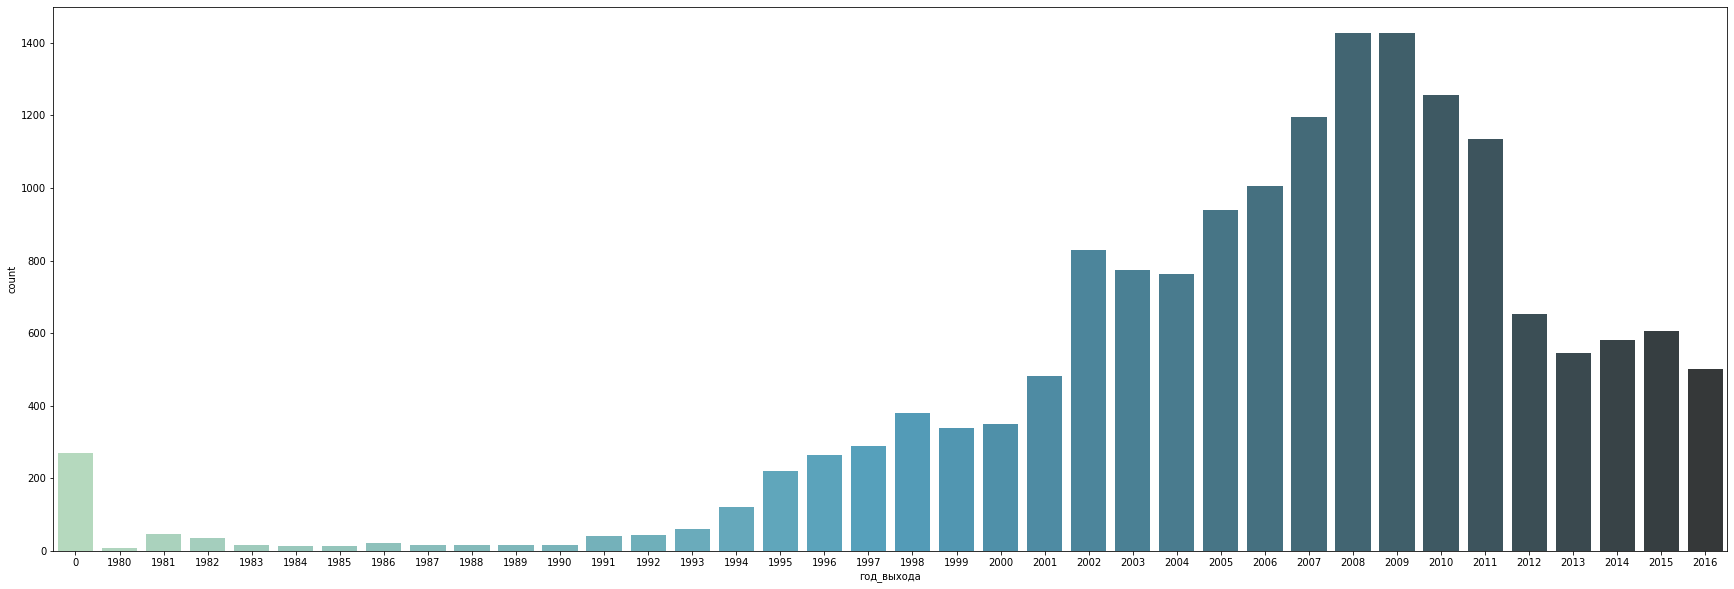

In [17]:
# Посмотрим на продажи за всё время 
sales= df.pivot_table(index='год_выхода', values='все_продажи', aggfunc='count')
sales.columns = ['count']
f, ax = plt.subplots(figsize=(30,10))
ax = seaborn.barplot(x=sales.index, y="count", data=sales, palette="GnBu_d")

  Из графика можно подчерпнуть, что и до Pentium 1  были игры, например на Spectrum и его подобным, после появились "Денди" и "Сега". До 2009 года рынок всё время рос, а затем вышла революция на рынке мобильных устройств - Iphone 3. (Прекрасно помню тот день, когда коммуникаторы на Windows mobile и смартфоны на Simbian, стали никому не нужны).

In [18]:
total = df[df['год_выхода']==2008]['все_продажи'].sum()
table = pd.pivot_table(df, 
                       index=["год_выхода"],
                       values=['все_продажи'],
                       aggfunc=[np.sum, 
                                (lambda x: sum(x)/total*100)
                               ])
display(table)

,sum,<lambda>
,все_продажи,все_продажи
год_выхода,,
0,98.92,14.731199
1980,11.38,1.694713
1981,35.68,5.313477
1982,28.88,4.300819
1983,16.80,2.501862
1984,50.35,7.498138
1985,53.95,8.034252
1986,37.08,5.521966


После 2009 года продажи падали в среднем на 10%, в 2012и13 годах были одинаковы, а затем падение ускорилось на 25-30% по году.

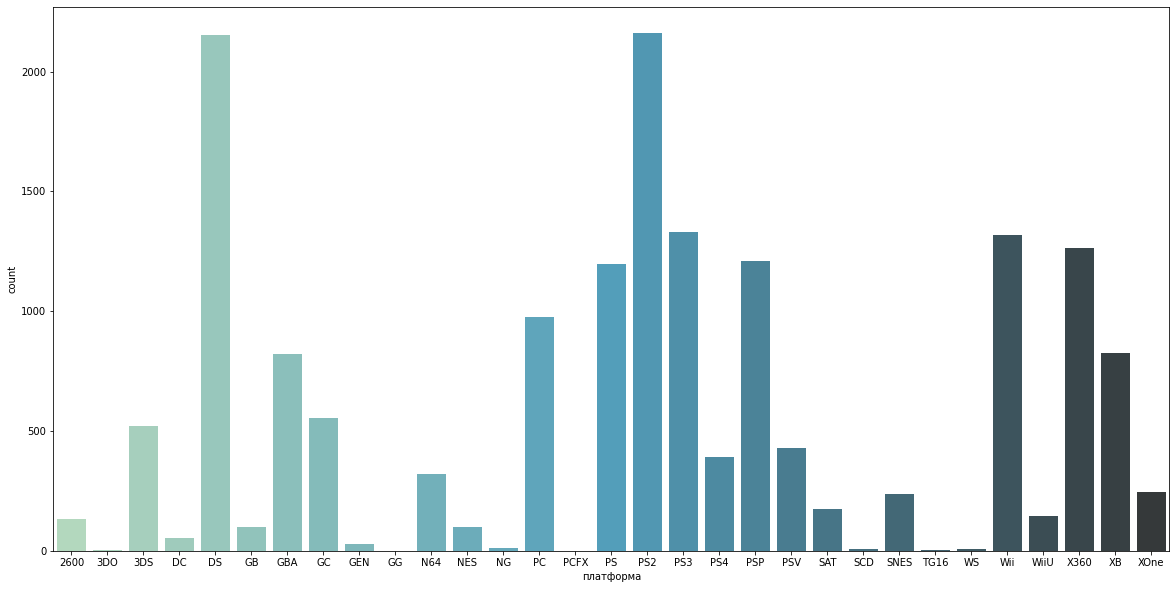

In [19]:
platform = df.pivot_table(index='платформа', values='все_продажи', aggfunc='count')
platform.columns = ['count']
f, ax = plt.subplots(figsize=(20,10))
ax = seaborn.barplot(x=platform.index, y="count", data=platform, palette="GnBu_d")

In [20]:
#(df['платформа']=='DS').sum()

In [21]:
#(df['платформа']=='PS2').sum()

Из выше преведённого видим, что на лидирующих позициях Nintendo DS и Sony PS2, затем в порядке убывания PS3, Wii, X-box 360, PSP, PS и другие. Примечательно, что если бы не пиратский софт, бар персонального компьютера, скорее всего, обошел бы и лидеров нашего графика. 

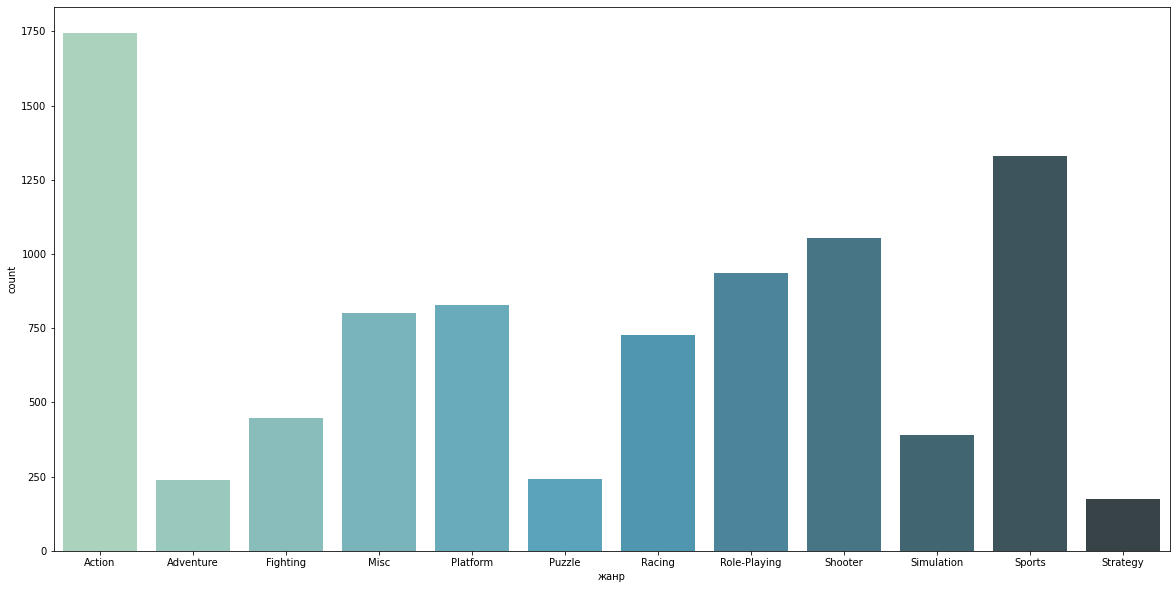

In [22]:
genre = df.pivot_table(index='жанр', values='все_продажи', aggfunc='sum')
genre.columns = ['count']
f, ax = plt.subplots(figsize=(20,10))
ax = seaborn.barplot(x=genre.index, y="count", data=genre, palette="GnBu_d")

Экшен, спорт, шутеры. И точно не пазлы, хотя они чуть прибыльнее стратегий!

In [23]:
#посмтроим ящик с усами по продажам
#plot = df.boxplot(df.groupby('платформа')['все_продажи'], figsize=(8, 8)).set_ylim(0, 2.5)
#plt.title('Диаграмма по продажам игр')


<AxesSubplot:xlabel='год_выхода'>

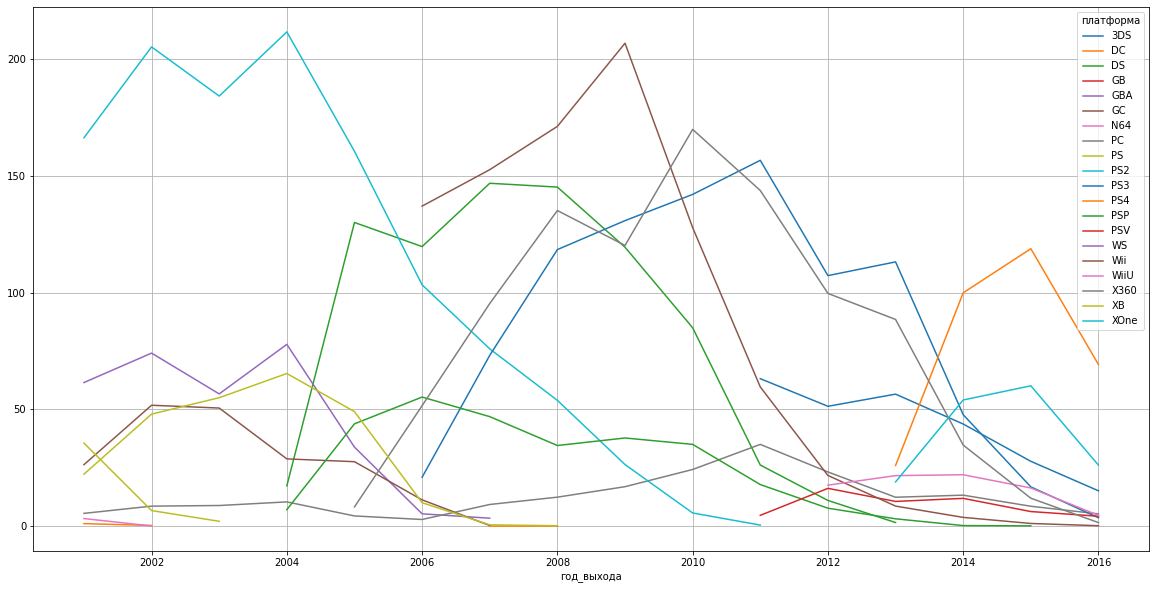

In [24]:

df[df['год_выхода']>2000].pivot_table(index='год_выхода', columns = 'платформа', values = 'все_продажи', aggfunc = 'sum').plot(grid=True, figsize=(20, 10))

     Проанализировав графики приходим к заключению: есть определённая закономернось, игровая консоль, а точнее интерес кней и играм для платформы набирают критичискую массу примерно через 1-1,5 года, думаю к этому времени можно делать первые заключения по рекламным компаниям и в целом первые итоги по вложениям в разработку консоли. Затем через 2 - 2.5 года можно делать заключение о популярности консоли. Пиком популярности можно считать период первые 4-5 лет, затем постепенное угасание, в течении 2х и чуть более лет. Таким образом для поддержания жизни платформы, новые консоли должны появляться раз в 8 лет, а первые рендеры желательно объявлять уже через 6-7 лет. Поддержку консолей предыдущего поколения то же никто не отменял, таким образом время жизни одной консоли достигает в среднем 10 лет.

  - Посмотрим на продажи самых популярных консолей.

In [25]:
top_consol = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'XB', 'PS4', 'XOne','3DS']

<AxesSubplot:xlabel='год_выхода'>

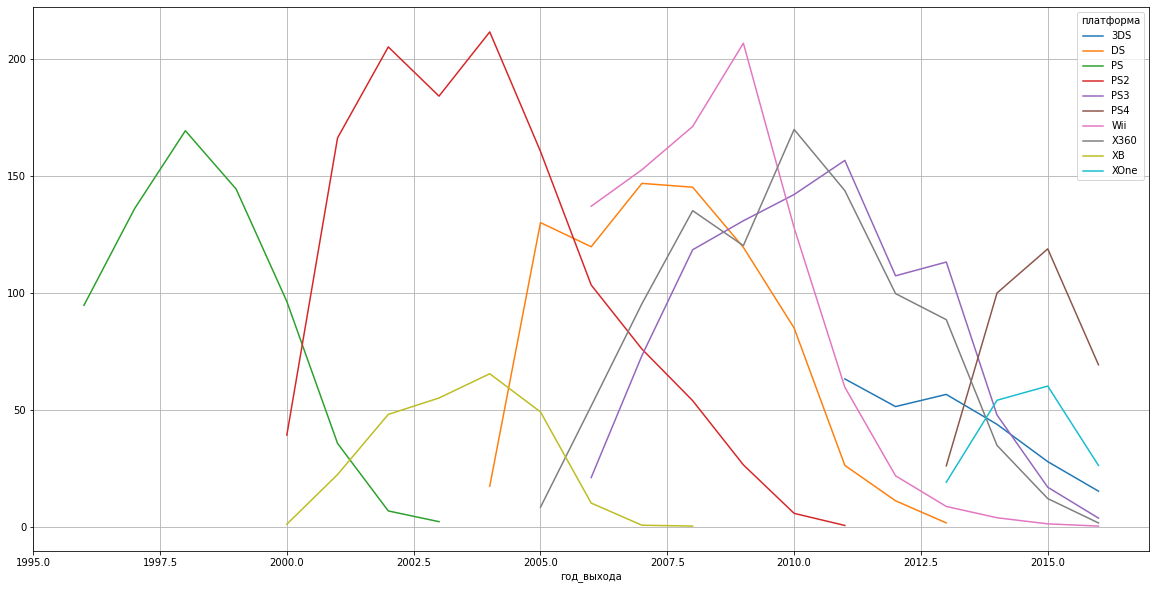

In [26]:
df[df['год_выхода']>1995].query('платформа == @top_consol').pivot_table(index='год_выхода', columns = 'платформа', values = 'все_продажи', aggfunc = 'sum').plot(grid=True, figsize=(20, 10))

<AxesSubplot:xlabel='год_выхода'>

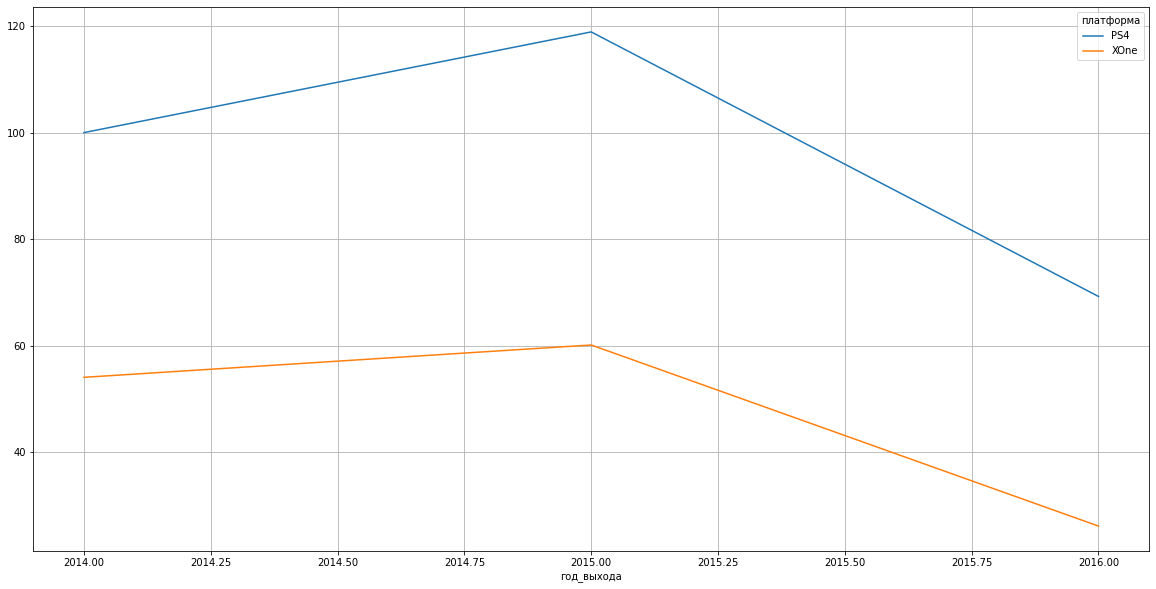

In [27]:
top_new = ['PS4', 'XOne']
df[df['год_выхода']>2013].query('платформа == @top_new').pivot_table(index='год_выхода', columns = 'платформа', values = 'все_продажи', aggfunc = 'sum').plot(grid=True, figsize=(20, 10))

Нас интересуют продажи сравнительно новых консолей в платформе, а именно PS4 и XONE. Их старшие версии входят в топ платформ, именно по ним мы сможем построить прогноз на 2017год. Началом актуального периода можно считать 2013 год, с этотго момента выходят новые консоли. Карманные 3ds и PSV, а так же старшую WIIU хоть и можно назвать условно свежими, однако популярность они не набрали и ипродажи сводятся к минимуму. 

В топ консолей мы добавили новые от Sony и Microsoft соответственно и хоть они стартовали в один момент к 2015 году уже ясно, что PS4 отрывается, а это значит что и в 2017 скорее всего она будет набирать популярность. Так же в целом по платформе с 2000 у PS заметно больше аудитория чем у Xbox.

In [28]:
# Новая таблица:
df_new = df[df['год_выхода']>2013]
df_new.head(5)

,название,платформа,год_выхода,жанр,продажи_северная_америка,продажи_европпа,продажи_япония,прдажи_другое,оценка_критиков,оценка_игроков,рейтинг,возрастные_ограничения,все_продажи
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0.0,0.0,0,Неизвестен,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,16+,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,0.0,0.0,0,Неизвестен,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,6+,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,0.0,0.0,0,Неизвестен,7.98


In [29]:
# Выведеим тоже самое, но не графически. Нас интересуют общие продажи по сути для прогнозирования актуальных платформ.
display ('Продажи 2013-2016', df_new.pivot_table(index='платформа', values = 'все_продажи', aggfunc = 'sum'))

'Продажи 2013-2016'

,все_продажи
платформа,
3DS,86.68
PC,27.05
PS3,68.18
PS4,288.15
PSP,0.36
PSV,22.40
Wii,5.07
WiiU,42.98
X360,48.22


К 3 марта 2017 3DS, заменит продолжение платформы - Nintendo Switch, этой консолью Nintendo перекроет сразу две потребности рынка, а именно карманные и стационарные консоли. И хоть DS была достаточно популярна и могла тигаться с мостодонтами рынка Sony и Microsoft, 3DS не смогла привлечь к себе внимания ожидаемого маркетологами и за 4-5 лет практически полностью себя изжила - если по простому "не выстрелила".

  - Ящик с усами.

(0.0, 3.0)

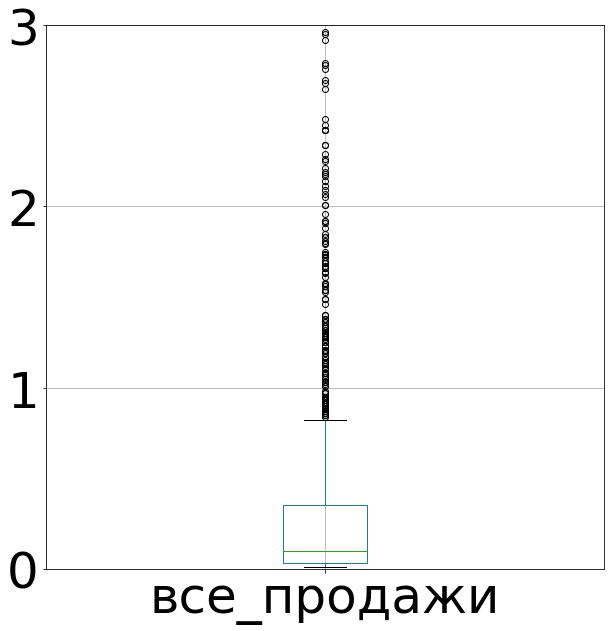

In [30]:
# Общий вид для обеих консолей:
df_new.boxplot(column='все_продажи',fontsize=50, figsize=(10,10))
plt.ylim([0,3])

(0.0, 3.0)

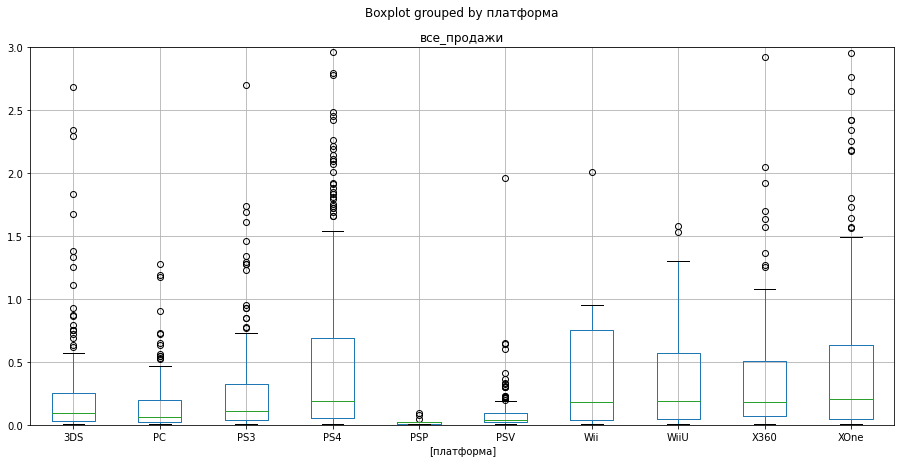

In [31]:
df_new.boxplot(column = 'все_продажи', by = ['платформа'], grid=True, figsize=(15, 7))
plt.ylim([0,3])

In [32]:
df_new.groupby('платформа')['все_продажи'].describe()

,count,mean,std,min,25%,50%,75%,max
платформа,,,,,,,,
3DS,212.0,0.408868,1.188368,0.01,0.0300,0.090,0.2500,11.68
PC,151.0,0.179139,0.329359,0.01,0.0200,0.060,0.2000,3.05
PS3,219.0,0.311324,0.633059,0.01,0.0400,0.110,0.3250,5.27
PS4,376.0,0.766356,1.614969,0.01,0.0575,0.185,0.6900,14.63
PSP,13.0,0.027692,0.027735,0.01,0.0100,0.020,0.0200,0.09
PSV,295.0,0.075932,0.141591,0.01,0.0200,0.040,0.0900,1.96
Wii,11.0,0.460909,0.625451,0.01,0.0350,0.180,0.7550,2.01
WiiU,73.0,0.588767,1.161467,0.01,0.0500,0.190,0.5700,7.09
X360,111.0,0.434414,0.628967,0.01,0.0700,0.180,0.5050,4.28


В данном случае мы видим, что от "карманных" приставок выручка меньше, хотя колличество продаж иногда не уступает старшим версиям, а затраты на разработку игр относительно соизмеримы. Одновременно с этим медианное значение для старших консолей где-то в районе 0,2-0,3 млн - это совсем не запредельная цифра учитывая сколько на сегодня тратится средств на разработку игр. Для "карманных" консолей и того меньше - медиана варьируется от 0,05 до 0,1 млн.

  - Что бы проследить оценки критиков и игроков посмотрим на общую картину.

<AxesSubplot:xlabel='оценка_критиков', ylabel='все_продажи'>

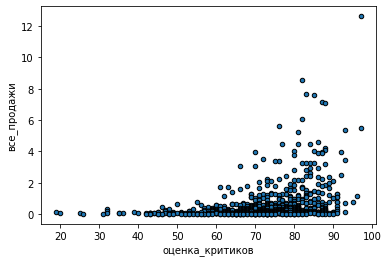

In [33]:
df_new[df_new['оценка_критиков']>0].plot(kind='scatter', x='оценка_критиков', y='все_продажи', ec='black')

<AxesSubplot:xlabel='оценка_игроков', ylabel='все_продажи'>

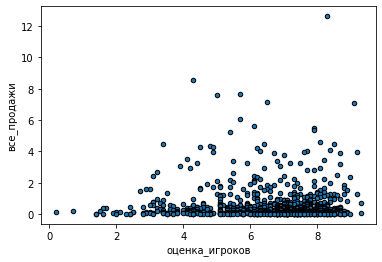

In [34]:
df_new[df_new['оценка_игроков']>0].plot(kind='scatter', x='оценка_игроков', y='все_продажи', ec='black')

<AxesSubplot:>

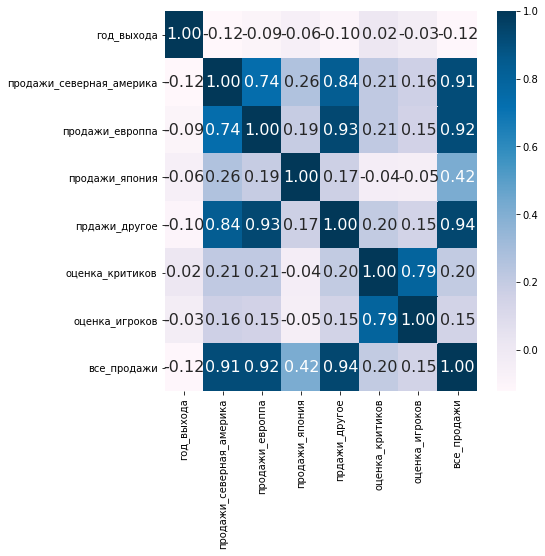

In [35]:
plt.figure(figsize=(7,7))
seaborn.heatmap(df_new.corr(), annot=True, cmap="PuBu", fmt='.2f', annot_kws={'size':16})

<AxesSubplot:>

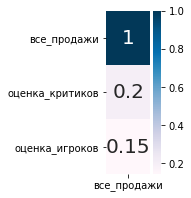

In [36]:
filtered = df_new[['все_продажи','оценка_игроков', 'оценка_критиков']]
plt.figure(figsize=(1,3))
seaborn.heatmap(filtered.corr()[['все_продажи']].sort_values(by='все_продажи', ascending=False), cmap="PuBu", 
            annot=True, annot_kws={'size':20})

Что касается мнения критиков - чем больше оценка, тем больше продажи. И эта закономерность просматривается на всех консолях платформ. Схожая картина и на графике оцнок игроками, однако игроки более критичны и разборчивы в своих оценках.

### Вывод по секции анализ данных:

   - История игр начинается в 1980 году, хотя в широком плане с 1994-95 годов с появление первых консолей в 2008-09 годах продажи копий набирают критическую массу. Это значит, что спрос и предложение в своего рода балансе, и покупательские способности потребителей соответствуют ожиданиям геймеров, маркетологов, разработчиков а самое главное производителей консолей. За тем с расширением возможностей мобильных устройств начал падать спрос и на консоли, игры как и сами консоли начали дорожать. Всё это вполне очевидно т.к. покупательская способность потенциальных пользователей невелика ибо на все эти игры нужно время, которое пропорционально уменьшается с увеличением трудозатрат на возможность заработать на эти игры и консоли.
   
   - Каждая новая консоль стоит дороже предыдущей, это объясняется инфляцией и как не странно сложностью изготовления комплектующих. Одна консоль вполне себе жизнеспособна до 10 лет, хотя её 'трупное окоченение' начинается уже через 7. Как раз к этому времени появляются рендеры новых консолей уже известных нам платформ, а ещё через год маркетологи начинают муссировать эту тему в сми - это очень важно для того, что бы игроки начали готовиться к покупке новых устройств, а магазины усиленно сбывали остатки на складах. О популярности консоли и платформы в целом можно судить через 2,5 - 4 года от старта новой консоли.
   
   - К концу 2016 года можно в полне конкретно опреде лить, что в 2017 году лидером продаж консолей и игр для них станет продукция Sony - PS4. Игры которые принесут наибольшую прибыль - это экшены, спорт и шутеры. (Да же на сегодняшний день с ценой в более 90 тыс за консоль и более 5тыс за игру это самый дешевый отдых, а значит игры будут популярны.)
   
   - Медианы продаж для платформ Sony и Microsoft варьируются в районе 0,25 млн, причём это характерно как для консолей предыдущих поколений, так и для новых. Верхняя граница предела для них варьируется в районе 1,5 млн, исключая PS2 и XB. Что касаетя передовых консолей, мы так же видим, что для PS4 немного обходит XONE в верхней границе предельных значений продаж.  Для Nintendo продажи сложились немного иначе. Медианные продажи в районе  0,15-0,2 млн, верхняя граница для основной консоли 1,1 млн, для карманных версий 0,6-0,75 млн.

### Шаг 4. Составьте портрет пользователя каждого региона

   - Определите для пользователя каждого региона (NA, EU, JP).
   - Самые популярные жанры (топ-5). Поясните разницу.
   - Влияет ли рейтинг ESRB (возрастные ограничения) на продажи в отдельном регионе?

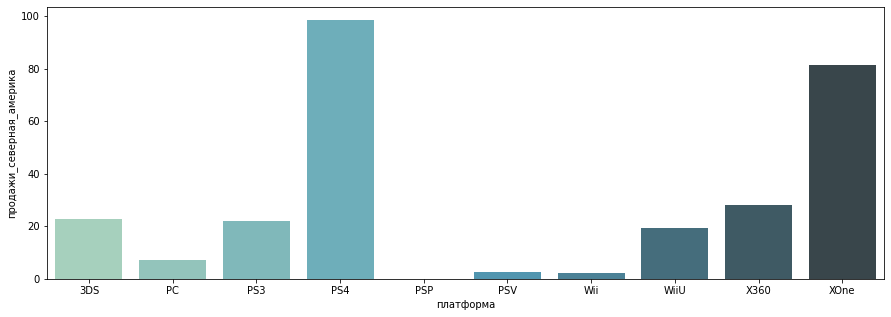

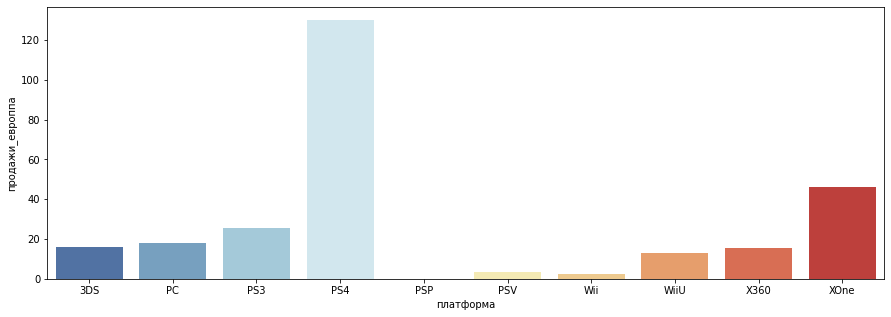

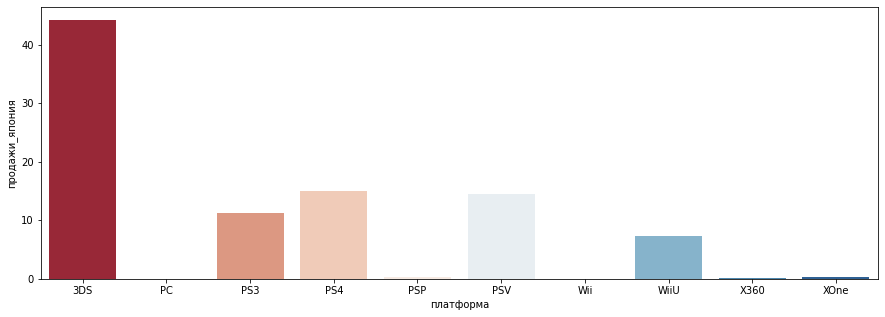

In [37]:
sales = df_new.pivot_table(index='платформа', values='продажи_северная_америка', aggfunc='sum')
sales.columns = ['продажи_северная_америка']
f, ax = plt.subplots(figsize=(15,5))
ax = seaborn.barplot(x=sales.index, y="продажи_северная_америка", data=sales, palette="GnBu_d")

sales = df_new.pivot_table(index='платформа', values='продажи_европпа', aggfunc='sum')
sales.columns = ['продажи_европпа']
f, ax = plt.subplots(figsize=(15,5))
ax = seaborn.barplot(x=sales.index, y="продажи_европпа", data=sales, palette="RdYlBu_r")

sales = df_new.pivot_table(index='платформа', values='продажи_япония', aggfunc='sum')
sales.columns = ['продажи_япония']
f, ax = plt.subplots(figsize=(15,5))
ax = seaborn.barplot(x=sales.index, y="продажи_япония", data=sales, palette="RdBu")

Из диаграмм видим:
   - топ-5 для Америки: PS2, X360, Wii, PS3 и DS, PS.
   - топ-5 для Европпы: PS2, PS3, X360, PS.
   - топ-5 для Японии: DS, PS и PS2, SNES, NES, 3DS.

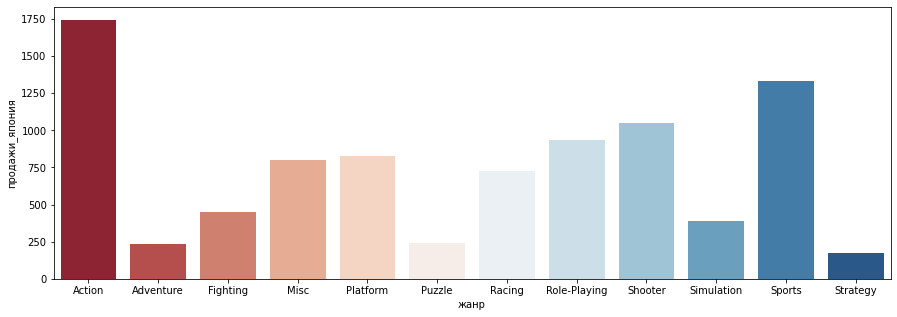

In [38]:
sales = df_new.pivot_table(index='платформа', values='продажи_япония', aggfunc='sum')
genre.columns = ['продажи_япония']
f, ax = plt.subplots(figsize=(15,5))
ax = seaborn.barplot(x=genre.index, y="продажи_япония", data=genre, palette="RdBu")

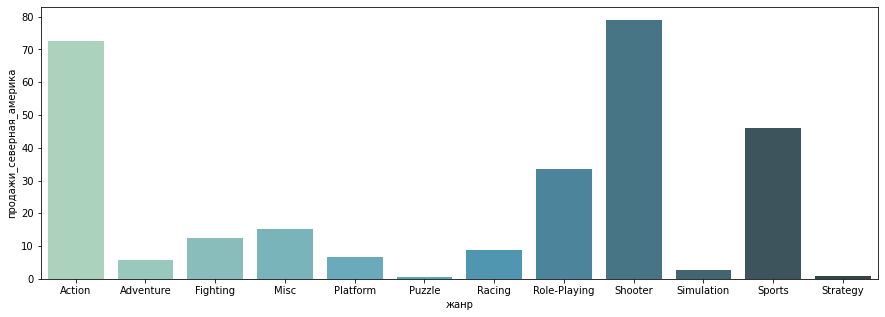

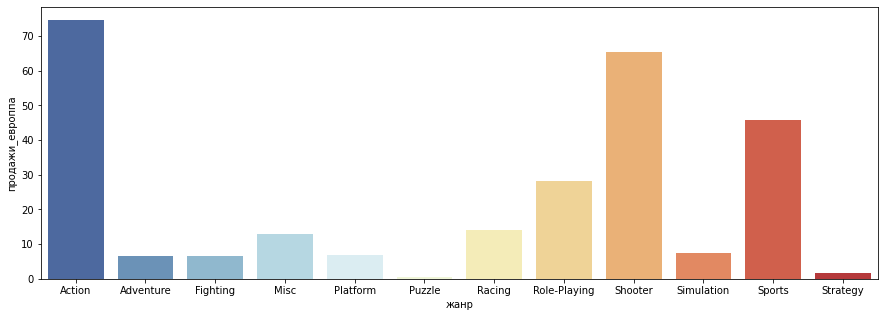

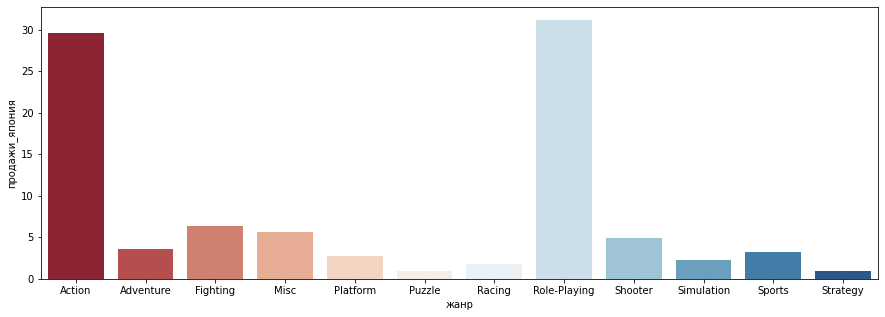

In [39]:
genre = df_new.pivot_table(index='жанр', values='продажи_северная_америка', aggfunc='sum')
genre.columns = ['продажи_северная_америка']
f, ax = plt.subplots(figsize=(15,5))
ax = seaborn.barplot(x=genre.index, y="продажи_северная_америка", data=genre, palette="GnBu_d")

genre = df_new.pivot_table(index='жанр', values='продажи_европпа', aggfunc='sum')
genre.columns = ['продажи_европпа']
f, ax = plt.subplots(figsize=(15,5))
ax = seaborn.barplot(x=genre.index, y="продажи_европпа", data=genre, palette="RdYlBu_r")

genre = df_new.pivot_table(index='жанр', values='продажи_япония', aggfunc='sum')
genre.columns = ['продажи_япония']
f, ax = plt.subplots(figsize=(15,5))
ax = seaborn.barplot(x=genre.index, y="продажи_япония", data=genre, palette="RdBu")

In [40]:
display(df_new.pivot_table(index='возрастные_ограничения', values = 'продажи_европпа', aggfunc = 'sum').style.bar(color = 'green'))
display(df_new.pivot_table(index='возрастные_ограничения', values = 'продажи_япония', aggfunc = 'sum').style.bar(color = 'red'))
display(df_new.pivot_table(index='возрастные_ограничения', values = 'продажи_северная_америка', aggfunc='sum').style.bar(color = 'blue'))

,продажи_европпа
возрастные_ограничения,
10+,26.160000
12+,34.070000
16+,93.440000
6+,58.060000
Неизвестен,58.950000


,продажи_япония
возрастные_ограничения,
10+,4.460000
12+,14.780000
16+,8.010000
6+,8.940000
Неизвестен,56.900000


,продажи_северная_америка
возрастные_ограничения,
10+,33.230000
12+,38.950000
16+,96.420000
6+,50.740000
Неизвестен,64.720000


### Вывод по секции портрет пользователя:
   Очень контрастные показания, что на одной стороне мира продаётся хорошо, на другой наоборот, итак подробнее:
   - В Европпе лучше продаются от Sony и Microsoft, а в Японии царит Nintendo. Хотя это характерно лишь для карманной верссии, старший брат - Wii в Европпе продаётся лучше, чем в Японии, что достаточно неоднозначно. Wii нацелена на интерактивное взаимодействие, возможно небольшие квартиры японцев просто не адаптировать под такого рода консоли. Рабочий день в Японии составляет зачастую 14-16 часов, а рабочая неделя 6 дней, под постоянную занятость и перегрузки очень хорошо подпадают карманные друзья DS и 3DS.
   - Та же картина с жанрами. Экшен, спорт и шутер лидируют в Америке  и Европпе. Японии карманные консоли не в силах тягаться со стационарными братьями, а значит заядлого геймера нужно брать сюжетом, по-этому жанр ролевых игр для Японского рынка выглядит выгоднее, сразу за ним следует тот же экшен.
   - По возрастным ограничениям в США и Европпе преобладает категория 6+ и 16+(с преобладанием последней), в Японии после 6+ сразу следует 12+. 
   - В то время как общие продажи за предыдущие 3 года в среднем падали на 30% от года к когду, у платформы от Microsoft ситуация сложилась ещё хуже, за 2016 год продажи упали на 50% от 2015 года. 

### Шаг 5. Проверьте гипотезы
   - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
   - Средние пользовательские рейтинги жанров Action и Sports разные.

#### 5.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

 - Н0 (нулевая гипотеза) - средние пользовательские рейтинги платформ XOne и PC одинаковые.
 - Н1 (альтернативная гипотеза) - средние пользовательские рейтинги платформ XOne и PC различны.

In [41]:
array1 = df_new[(df_new['платформа'] == 'XOne') & (df_new['оценка_игроков'] > 0)]['оценка_игроков']
array2 = df_new[(df_new['платформа'] == 'PC') & (df_new['оценка_игроков'] > 0)]['оценка_игроков']

alpha = .01 # критический уровень статистической значимости
# если p-value окажется меньше него - отвегнем гипотезу

results = st.ttest_ind(array1, array2)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


In [42]:
print('Средняя оценка пользователей игр для платформы XOne', array1.mean())
print('Средняя оценка пользователей игр для платформы PC', array2.mean())

Средняя оценка пользователей игр для платформы XOne 6.594545454545456
Средняя оценка пользователей игр для платформы PC 6.298360655737705


### Вывод:
Средняя оценка пользователей для PC и для XOne, практически неотличаются.

#### 5.2 Средние пользовательские рейтинги жанров Action и Sports разные.

 - Н0 - Средние пользовательские рейтинги жанров Action и Sports одинаковы.
 - Н1 (альтернативная гипотеза) - Средние пользовательские рейтинги жанров Action и Sports разные.

In [43]:
array1 = df_new[(df_new['жанр'] == 'Action') & (df_new['оценка_игроков'] > 0)]['оценка_игроков']
array2 = df_new[(df_new['жанр'] == 'Sports') & (df_new['оценка_игроков'] > 0)]['оценка_игроков']

alpha = .01 # критический уровень статистической значимости
# если p-value окажется меньше него - отвегнем гипотезу

results = st.ttest_ind(array1, array2)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 2.8711147985105864e-19
Отвергаем нулевую гипотезу


In [44]:
# Мы выводим значения, что бы понять правильно ли мы сформулировали вопрос и методику ответа на него.
print('Средняя оценка пользователей игр Action', array1.mean())
print('Средняя оценка пользователей игр Sports', array2.mean())

Средняя оценка пользователей игр Action 6.760606060606061
Средняя оценка пользователей игр Sports 5.2251968503937


### Вывод:
Средняя оценка пользователей отлична.

  - Гипотезы сформулированы, как проверка о равенстве двух средних генеральных совокупностей. Выборки не зависят друг от друга.

### Что было сделано:

Мы немного поработали с данными, добавили колонки "общие продажи" и "возрастные ограничения" - эта колонка является переработкой колонки рейтига. Провели исследовательский анализ данных, в нём мы узнали, историю игровой индустрии и наглядно убедились в том, что пик мира приставок уже прошел и был достаточно скоротечен. Для рынка Японии, США и Европпы (это 3 самых больших рынка) составили потртрет пользователей и выяснили, что США и Европпа практически ничем не отличаются, однако в США больше любят шутеры. Япония - это немного другой мир и потребности там немного сложнее. Мы проверили гипотезу о пользовательских рейтингах и узнали, что оценочные суждания для PC и XOne мало отличаются, а так же средняя оценка для жанров "экшен" и "спорт" имеют значительные отличия.

### Общий вывод:


  - С появлеием условно мощных носимых устройств рынок консолей начал постепенно валиться, это началось в 2009 году и на сегодняшний день продолжается. Это отражено в первом графике Исследовательского анализа. Именно по той причине, что носимые устройства постепенно проявляют способность частичной или полной замены консолей, а стоимость и сложность их изготовления растет - консоли постепенно собирают всё меньшую аудиторию. 
  - Больше всего спрос на игры жаров Экшен, спорт и шутер. Это связано с глубокой потребностью эмоциональной и физической разгрузки, собственно как и игры в целом, но конкретно эти категории требуют большей концентрации. Остальные жанры находят меньшую аудиторию. Однако для японии характерен жанр ролевых игр и того же экшена(с преобладанием первого).
  - В целом на продажи консолей влияет не только жанр игр, но и колличество игр, у Sony рынок гораздо шире. А значит 2017 год будет для PS4 достаточно урожайным.
  - На сегодняшний день будущее игровой индустрии вижу в стримминговых сервисах, т.к. современные консоли уровня 5го поколеия стоят достаточно дорого, а цены на игры на сегодняшний день не соответствуют потребительским ожиданиям - выгоднее продавать подписку. Так же это позволит отсечь пиратский контент, что в свою очередь даст более чистую аналитику, а следовательно и прогнозы. (Относительно предыдущего проэкта могу смело заявить, что нагрузки на сеть опять выростут)).